In [1]:
## libraries needs to run the script ##
import os
import glob
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

In [2]:
# set up the path to the data files
path = os.chdir('/media/sukanya/data/opls-charge-scale-emim-dca-IL/Polypergen-EMIM-DCA-IL/folder-500K/AA-to-CG-martini/align-index-poly-IL/change-beads-polymer-emim-dca-IL/mod-sigma-epsilon-TN2ar-C3-Q5-beads/test-interaction-cation-C3-bead/C3-cation-9/rdf-analysis/')

In [3]:
# Define paths for both datasets
current_folder = '.'  # current directory
other_folder = '/media/sukanya/SSD2/PolyParGen-CG-p123/test/rdf-analysis'

In [4]:
# list all rdf: different bead types for CG simulation
beadB = ['SC6', 'TC6', 'TC5e']
beadA = ['SP1ar', 'C3']
#beadC = ['TQ1', 'TN4']
#beadD = ['SC6', 'TC6h', 'TC5h']
#bead_names = ['SC6', 'TC6h', 'TC5h']
bead_names = ['SC6-SP1', 'SC6-C3', 'TC6h-SP1','TC6h-C3', 'TC5h-SP1', 'TC5h-C3']

In [5]:
gofr_beads = []
cutoff_dis = []
for B in beadB:
    #gofr = []; cutoff = []; 
    for A in beadA:  
        file_name = 'rdf-{}-{}.xvg'.format(B, A) 
        file_path = os.path.join(current_folder, file_name)
        data = np.loadtxt(file_name, skiprows=25)
        data.view(np.float64)
        gofr_value = data[:5054,1]
        dist_value = data[:5054,0]
        print(file_name)
 
        gofr_beads.append(gofr_value)
        cutoff_dis.append(dist_value)

rdf-SC6-SP1ar.xvg
rdf-SC6-C3.xvg
rdf-TC6-SP1ar.xvg
rdf-TC6-C3.xvg
rdf-TC5e-SP1ar.xvg
rdf-TC5e-C3.xvg


In [6]:
gofr = []
cutoff = []
bead_names = ['SC6-EO', 'SC6-PO', 'TC6h-EO','TC6h-PO', 'TC5h-EO', 'TC5h-PO']
# list all rdf: different bead types for CG simulation
beadB = ['SC6', 'TC6h', 'TC5h']
beadA = ['SP1', 'C3']
for B in beadB:
    #gofr = []; cutoff = []; 
    for A in beadA:  
        file_name = 'rdf-{}-{}-AA.xvg'.format(B, A)
        file_path = os.path.join(current_folder, file_name)
        data = np.loadtxt(file_name, skiprows=25)
        data.view(np.float64)
        gofr_value1 = data[:5054,1]
        dist_value1 = data[:5054,0]
        print(file_name)
 
        gofr.append(gofr_value1)
        cutoff.append(dist_value1) 

rdf-SC6-SP1-AA.xvg
rdf-SC6-C3-AA.xvg
rdf-TC6h-SP1-AA.xvg
rdf-TC6h-C3-AA.xvg
rdf-TC5h-SP1-AA.xvg
rdf-TC5h-C3-AA.xvg


In [7]:
## the CG data sets before optimization ##
gofr2 = []
cutoff2 = []
# Read second dataset from another folder
beadB = ['SC6', 'TC6h', 'TC5h']
beadA = ['SP1', 'C3']
for B in beadB:
    for A in beadA:  
        file_name = 'rdf-{}-{}.xvg'.format(B, A) 
        file_path = os.path.join(other_folder, file_name)  # Read from other folder
        data = np.loadtxt(file_path, skiprows=25)
        data.view(np.float64)
        gofr_value2 = data[:5054,1]
        dist_value2 = data[:5054,0]
        print(file_name)
 
        gofr2.append(gofr_value2)
        cutoff2.append(dist_value2)

rdf-SC6-SP1.xvg
rdf-SC6-C3.xvg
rdf-TC6h-SP1.xvg
rdf-TC6h-C3.xvg
rdf-TC5h-SP1.xvg
rdf-TC5h-C3.xvg


0
1
2
3
4
5


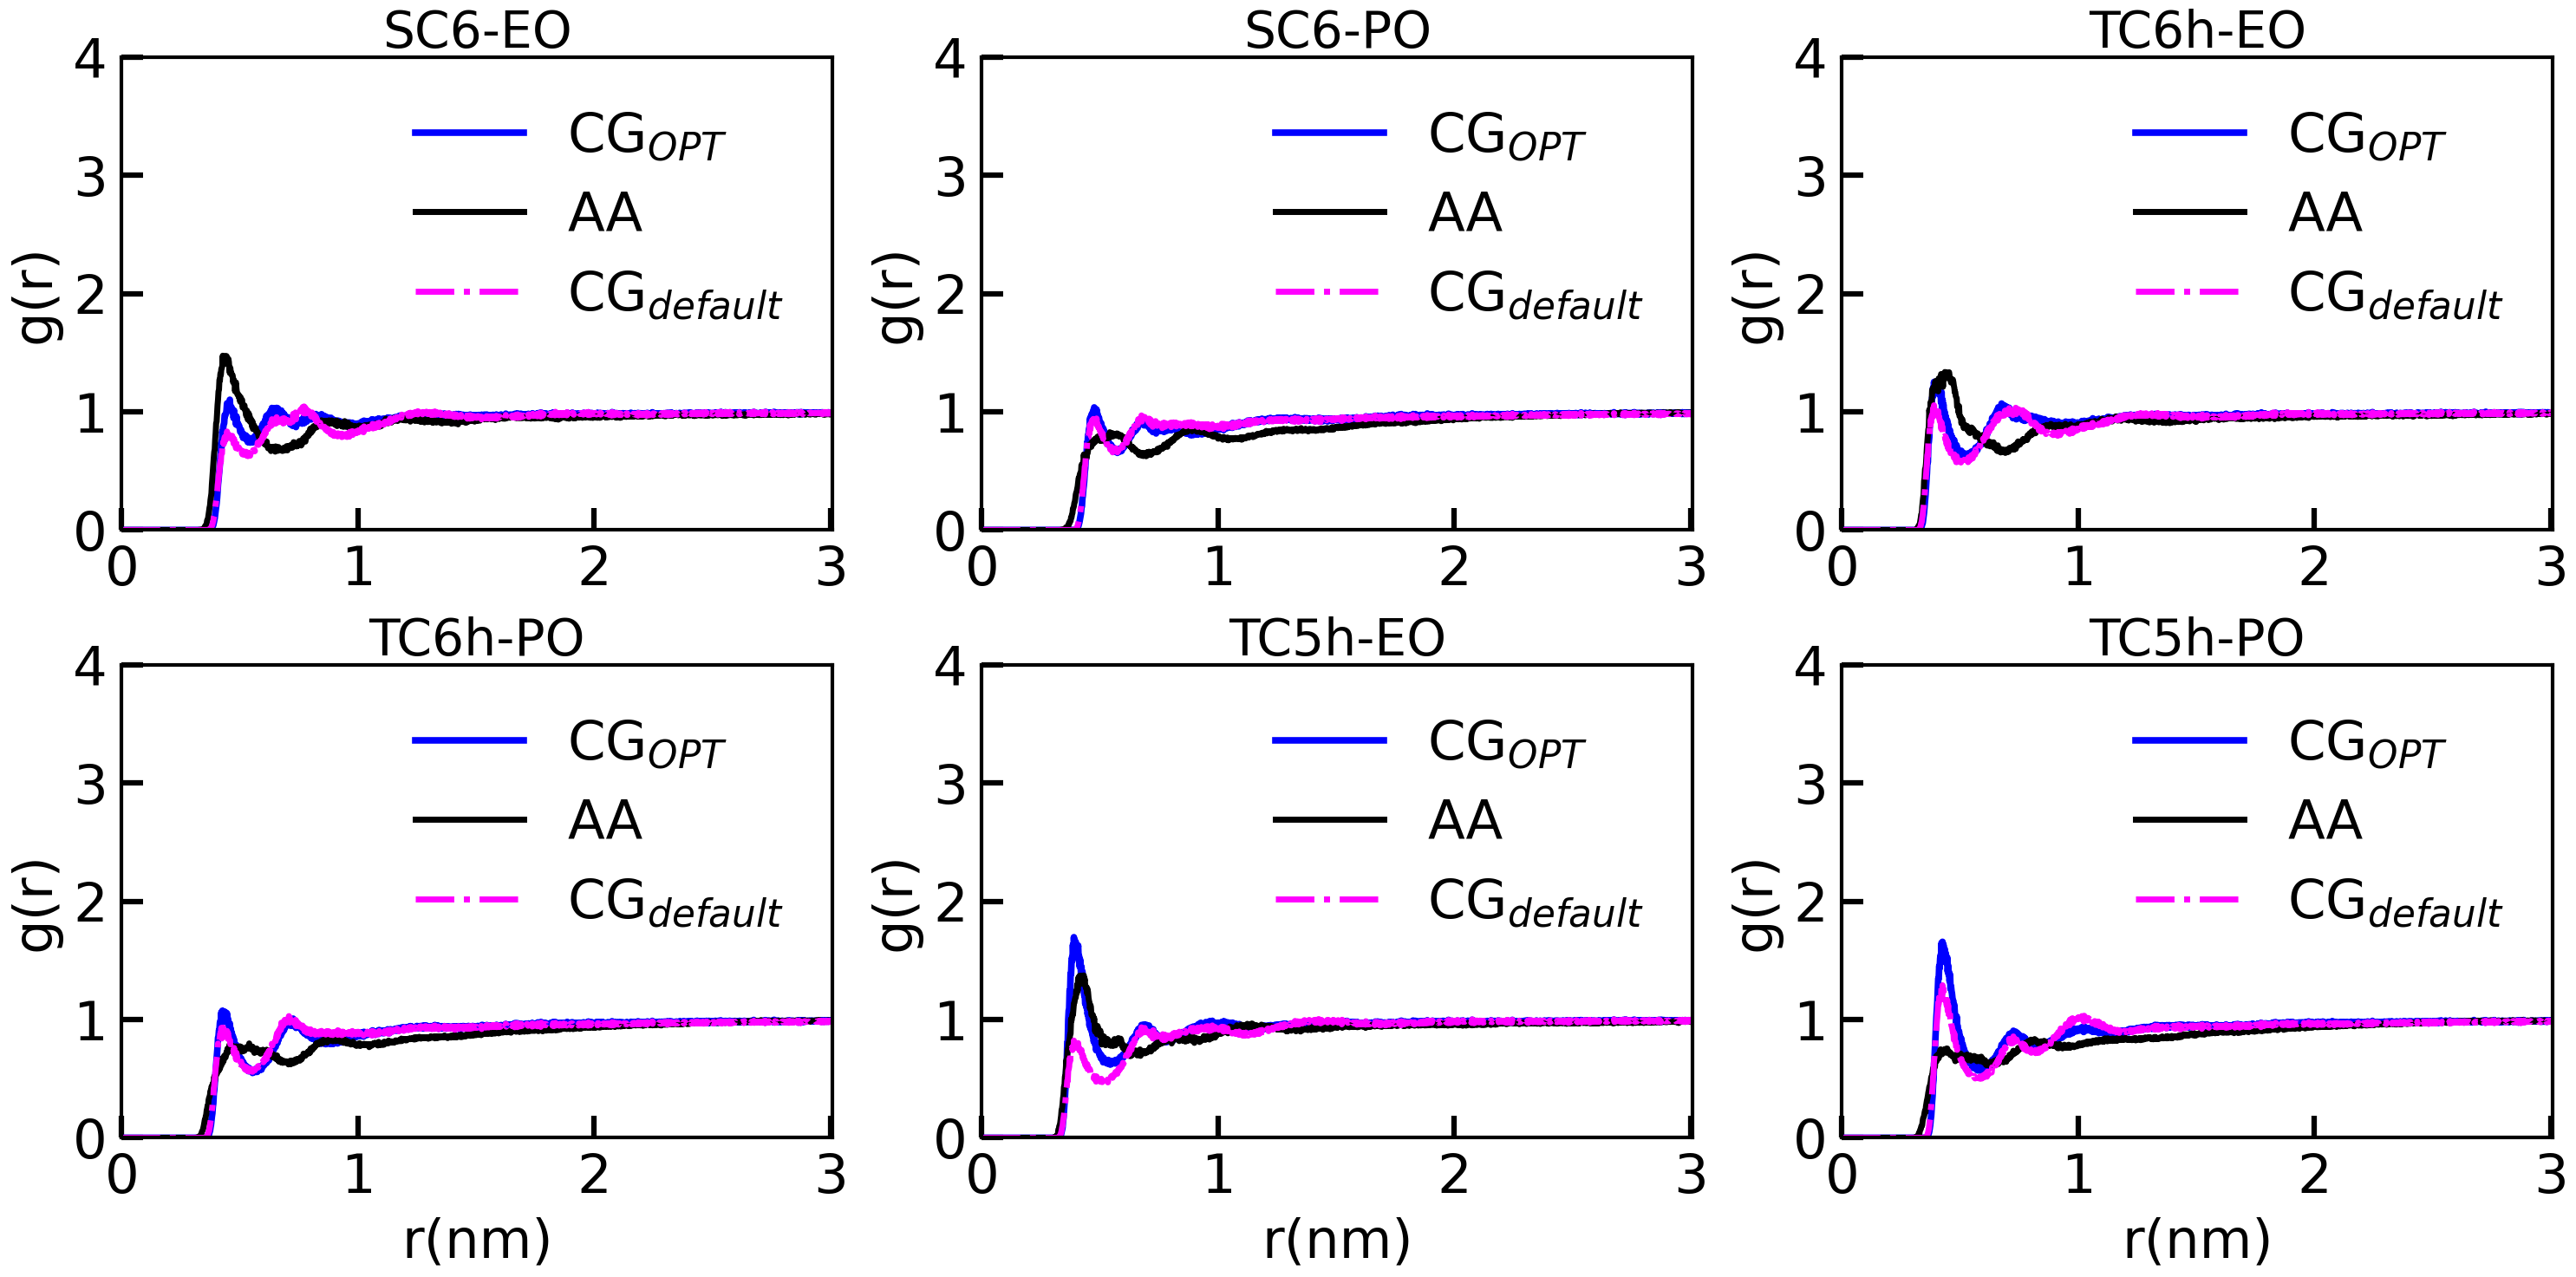

In [12]:
# plot everything

### gofr for all combination beads
a = 2; b =3; c = 1 # initialize plot counter
fig = plt.figure(figsize=(30,15))
from pylab import*
rc('axes', linewidth=3.0)
diff = []
di = []
for i in range(0,6):
        print(i)
        diff = (gofr[i] - gofr_beads[i]).mean()
        di.append(diff)
#for i in range(0,6):
#        print(i)
        plt.subplot(a,b,c)
        c += 1
        plt.ylabel('g(r)', fontsize=45, labelpad=10,  fontname='sans-serif')
        plt.xlabel('r(nm)',fontsize=45,labelpad=10, fontname='sans-serif' )
        ##plt.title('gofr for {} beads'.format(bead_names[i]), fontsize=30)
        ##plt.title(format(di[i], ".4f"), y=0.50, pad=-14, fontsize=40)
        plt.ylim([0, 4])
        plt.xlim([0, 3.01])
       
        plt.tick_params(axis='both', which='major', length=18, direction='in', width=4.5, labelsize=45, pad=12)
        plt.plot(cutoff_dis[i], gofr_beads[i], linewidth=5.5,color='blue',label= "CG$_{OPT}$")
        plt.plot(cutoff[i], gofr[i], linewidth=5,color='black', label="AA")
        plt.plot(cutoff2[i], gofr2[i], linewidth=5,color='magenta', label="CG$_{default}$",linestyle='-.' )
        ax = plt.gca()
        ax.text(0.5, 1.05, '{}'.format(bead_names[i]), transform=ax.transAxes, fontsize=42, ha='center', va='center')
        ax.set_xticks(np.arange(0, 3.01, 1))
        # Remove x-axis label for first row (plots 0, 1, 2)
        if i < 3:
            ax.set_xlabel('')  # Remove x-axis label for first row
        plt.legend(fontsize=45, bbox_to_anchor=(1.00,0.99), loc='upper right', edgecolor='white')
fig.tight_layout()
fig.savefig("Figure3B-final.png", dpi=500, transparent=True)
plt.show()